# How process files in a folder


See also
* [Working with files in python](https://realpython.com/working-with-files-in-python/)
* [Iterate over files in a directory](https://newbedev.com/how-to-iterate-over-files-in-a-given-directory)

In [1]:
import os

# define the location of the folder to go through
directory = '../data/beads/'

# get a list of files in that folder
file_list = os.listdir(directory)

file_list

['243.tif', '245.tif', '271.tif', '277.tif', 'image data source.txt']

Obviously, there are not just images in that folder. Let's filter the list:

In [2]:
image_file_list = [file for file in file_list if file.endswith(".tif")]

image_file_list

['243.tif', '245.tif', '271.tif', '277.tif']

Alternatively, we can also write a longer for-loop and check if files are images:

In [3]:
# go through all files in the folder
for file in file_list:
    # if the filename is of a tif-image, print it out
    if file.endswith(".tif"):
        print(file)

243.tif
245.tif
271.tif
277.tif


In order to show all images, we need to open them from the correct `directory`:

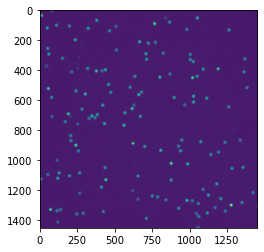

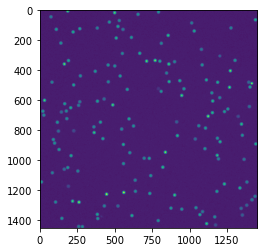

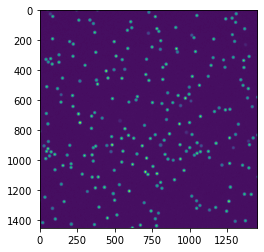

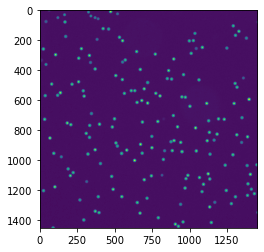

In [4]:
from skimage.io import imread
from matplotlib.pyplot import imshow, show

# go through all files in the folder
for image_file in image_file_list:
    image = imread(directory + image_file)
    imshow(image)
    show()

[Custom functions](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/python_basics/09_custom_functions.ipynb) help us to keep code organized. For example, we can put image-analysis code in a function and then just call it:

In [5]:
from skimage.io import imread
import numpy as np

def load_and_measure(filename):
    """
    This function opens an image and returns its mean intensity.
    """
    image = imread(filename)
    
    # return mean intensity in the image
    return np.mean(image)

# for testing
load_and_measure(directory + "277.tif")

108.2138434495215

With such a custom function, we can make use of short for-loops:

In [6]:
mean_intensities_of_all_images = [load_and_measure(directory + file) for file in image_file_list]
mean_intensities_of_all_images

[95.16940536089672, 95.94634976739597, 112.10313360881543, 108.2138434495215]

# Exercise
Open all images of the beads dataset, segment the images and measure the average size of the beads. Write measurement results to "beads.csv".

Hint: Instead of the `imshow` command in the last example, execute your image processing workflow. Setup the image processing workflow first, e.g. in a custom function. Programm iterating over files in a folder last, after the image processing works.